<a href="https://colab.research.google.com/github/Stepeech/NNLearn/blob/main/%D0%9F%D0%A05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Использование предобученной модели

## 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [48]:
import matplotlib.pyplot as plt
from tensorflow import keras

model = keras.applications.MobileNet()

model.summary() 
model.get_config() 

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

{'name': 'mobilenet_1.00_224',
 'trainable': True,
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_3'},
   'name': 'input_3',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (2, 2),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': False,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv1',
   'inbound_nodes': [[['input_3', 0, 0, {}]]]},
  {'cla

## 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

In [62]:
from urllib.request import urlopen
import cv2
import numpy as np

imageUrls = ['https://pokrovsk.news/uploads/news/redactor/rgpdskuuvpqzrhjw.jpg', 'https://i.ebayimg.com/images/g/W-IAAOSwFFRix1Ab/s-l500.jpg', 'https://ichef.bbci.co.uk/news/640/cpsprodpb/AE51/production/_95252644_tass_732047.jpg', 'https://upload.wikimedia.org/wikipedia/commons/9/93/NASA_Space_Shuttle_Discovery_STS-92.jpg', 'https://www.hellomonaco.ru/wp-content/uploads/2019/06/baukran-3703469_640-640x405-640x405.jpg']
# Фонтан, Айпод, Танк, Кран, Шаттл
images = []
for imageUrl in imageUrls:
    req = urlopen(imageUrl)
    image = np.asarray(bytearray(req.read()), dtype=np.uint8)
    image = cv2.imdecode(image, -1)
    images.append(image)

## 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС.

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [50]:
def normalize(images, shape):
  proc_images = []
  for image in images:
    proc_image = image.copy()
    proc_image = cv2.resize(proc_image, (shape[0], shape[1]))
    proc_images.append(proc_image)
  return np.asarray(proc_images)

## 1.4. Напишите функцию, принимающую на вход список с представлениями обработаннах изображений (результат работы функции из п. 1.3.) и возвращающую список предсказанных нейросетью классов. 

In [54]:
def predict(images):
    normalized_images = normalize(images, (224, 224, 3))
    preprcessed_images = keras.applications.mobilenet.preprocess_input(normalized_images)
    prediction = model.predict(preprcessed_images)
    return prediction

def print_predict(preds, image):
    output = image.copy()

    height = 30
    margin = 30
    for pred in preds:
        height += margin
        text = "{}: {:.2f}%".format(pred[1], pred[2] * 100)
        _ = cv2.putText(output, text, (10, height), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
            (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

## 1.5. Выведите изображения и соответствующие им классы, вызывая соответствующие функции

1/1 [==============================] - 0s 173ms/step


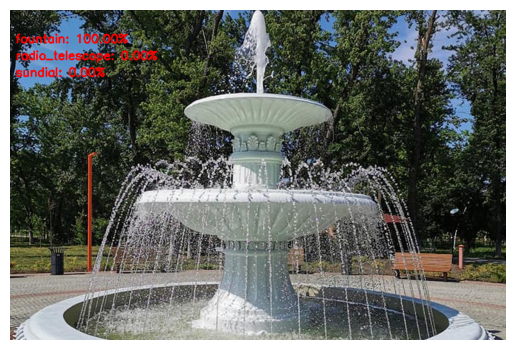

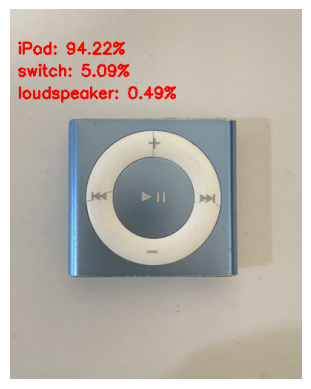

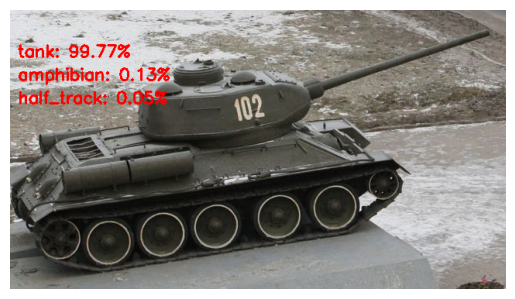

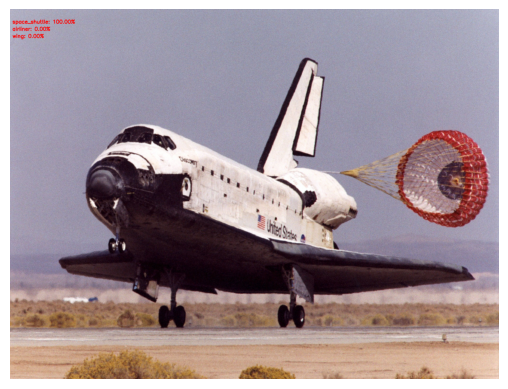

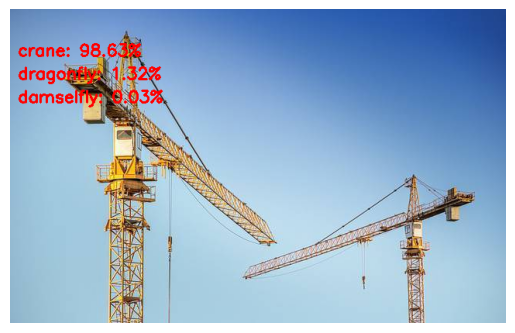

In [63]:
predictions = predict(images)
predictions = keras.applications.mobilenet.decode_predictions(predictions, top=3)
for i, preds in enumerate(predictions):
    print_predict(preds, images[i])